In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size=6 color='red'><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [5]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수 
                           n_features=2, # 독립변수 개수(기본값 20)
                           n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                           n_redundant=0, # 타겟변수에 영향을 미치지 않는 독립변수 수
                           n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹의 수 (0은 없음)
                           n_classes=2, # 타겟변수의 그룹수
                           random_state=123)
import numpy as np
print(X.shape, y.shape)
np.c_[X,y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

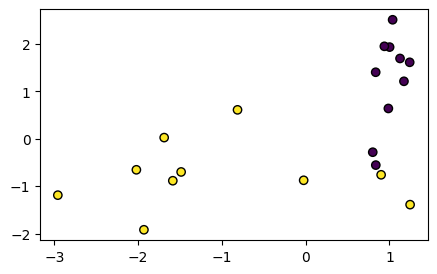

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, #군의 갯수
              init='k-means++', #초기 중심점을 서로 멀리. random(초기중심점랜덤)
              n_init=10, # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [12]:
model.cluster_centers_

array([[-1.56258716, -0.69768199],
       [ 1.01138251,  0.83200493]])

In [17]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('   예  측  값  :', pred)
print('   실  제  값  :', y)

model.labels : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
   예  측  값  : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
   실  제  값  : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


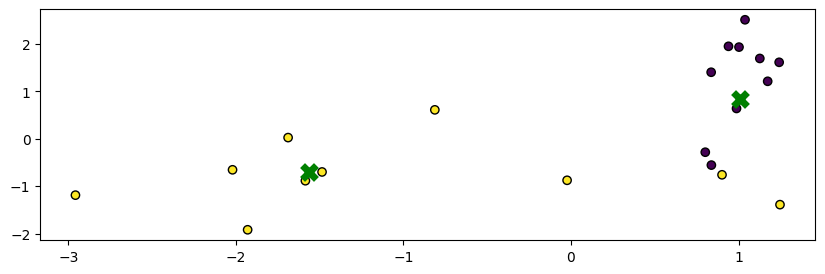

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y, edgecolors='k')
plt.scatter(x=centers[:,0], y=centers[:,1], c='g', marker='x', s=100, lw=5)
plt.show()

## cf Normalizer 적용

In [27]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667],
       [ 0.90134424, -0.75896558,  0.76493676, -0.64410538],
       [ 0.83653082,  1.40488232,  0.51161542,  0.85921456],
       [-0.02317631, -0.87481215, -0.02648361, -0.99964925],
       [ 0.83780453, -0.554389  ,  0.83395074, -0.55183889],
       [-1.9295722 , -1.91894047, -0.7090575 , -0.70515067],
       [-0.8124957 ,  0.61140818, -0.79903769,  0.60128094],
       [ 1.12694685,  1.69570061,  0.55350265,  0.83284742],
       [ 0.80138648, -0.28232585,  0.94318094, -0.33227958],
       [ 0.9399586 ,  1.9518949 ,  0.43387458,  0.90097328],
       [ 1.24232232,  1.6146173 ,  0.60980605,  0.79255068],
       [-1.48554751, -0.69890985, -0.90485891, -0.42571159],
       [ 1.24732102, -1.38872822,  0.66821427, -0.74396888],
       [-2.95714561, -1.18843377, -0.92787221, -0.37289833],
       [-1.5849172 , -0.

In [33]:
model = KMeans(n_clusters=2, init='random', 
               n_init='auto', #init가 k-means++이면 1, init가 random이면 10 
               max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [38]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([ 0.01539667, -0.99964925, -0.70515067,  0.60128094, -0.42571159,
       -0.37289833, -0.48721942, -0.30784666])

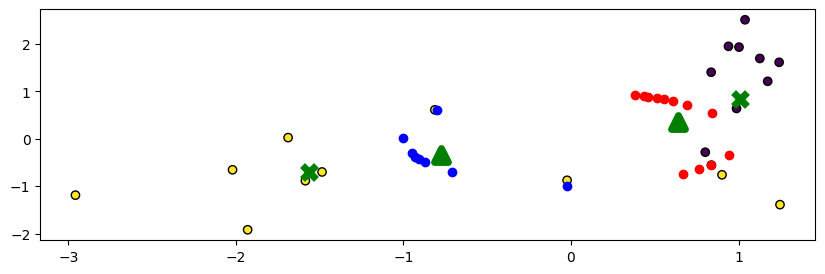

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:,0], y=X[:,1], c=y, edgecolors='k')
plt.scatter(x=centers[:,0], y=centers[:,1], c='g', marker='x', s=100, lw=5)
plt.scatter(x=Xnor[model.labels_==0, 0], y=Xnor[model.labels_==0, 1], c='b')
plt.scatter(x=Xnor[model.labels_==1, 0], y=Xnor[model.labels_==1, 1], c='r')
plt.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='g', marker='^', s=100, lw=5)
plt.show()

## K-Means 클러스터링의 한계점 (13p)
- 군의 특성이 다른 경우
    - 군의 크기가 다른 경우
    - 군의 밀도가 다른 경우
    - 군이 비구형일 경우
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

### 군의 크기가 다른 경우


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [5]:
np.random.seed(0)
# group0 : 평균-10, 표준편차2인 데이터 10행 2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0),0)
group0 = np.c_[group0,y]

In [7]:
# group1 : 평균10, 표준편차2인 10행 2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1),1)
group1 = np.c_[group1,y]

In [8]:
# group2: 평균0, 표준편차5인 100행 2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2),2)
group2 = np.c_[group2,y]

In [10]:
data = np.r_[group0, group1, group2]
data[::10]

array([[-6.47189531, -9.19968558,  0.        ],
       [ 7.90289407,  7.15996413,  1.        ],
       [-3.36230224, -1.79776581,  2.        ],
       [-5.8257492 ,  4.50413243,  2.        ],
       [ 9.41575349, -6.73879531,  2.        ],
       [ 1.88212766, -5.49700395,  2.        ],
       [-7.45628796,  2.19695851,  2.        ],
       [-2.49016225,  9.64766027,  2.        ],
       [-1.76996956, -6.87475647,  2.        ],
       [-1.84590919, -1.19689589,  2.        ],
       [-4.779725  , -1.72990888,  2.        ],
       [-3.18718513, -1.98635907,  2.        ]])

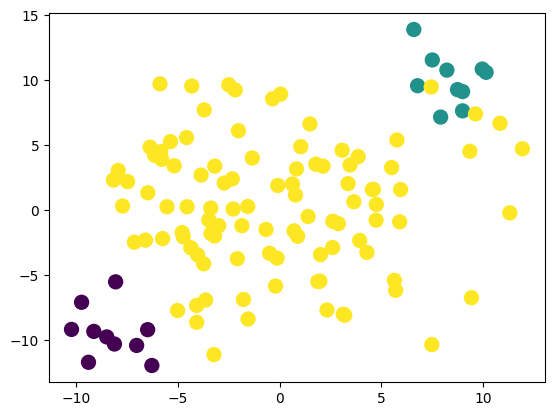

In [13]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100)

In [15]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [17]:
centers = model.cluster_centers_ # 중심점
centers

array([[-2.48588675, -6.1854847 ],
       [-1.28236299,  2.70036208],
       [ 8.49239286,  7.54361324]])

In [20]:
pred = model.predict(data[:, :2]) # 예측값
print(pred)
pred = model.labels_ # 모델이 클러스터링한 결과
print(pred)

[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 0 0 1 1 0 2 1 1 1 1
 1 1 1 0 1 1 0 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 0 1 0 0 0 0 1 1 1 0
 2 1 0 1 0 1 0 0 0 1 1 1 0 1 1 2 1 2 0 0 1 1 1 0 1 2 0 1 1 1 1 0 1 1 0 1 0
 1 0 2 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 0 0 1 1 0 2 1 1 1 1
 1 1 1 0 1 1 0 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 0 1 0 0 0 0 1 1 1 0
 2 1 0 1 0 1 0 0 0 1 1 1 0 1 1 2 1 2 0 0 1 1 1 0 1 2 0 1 1 1 1 0 1 1 0 1 0
 1 0 2 0 0 1 1 0 1]


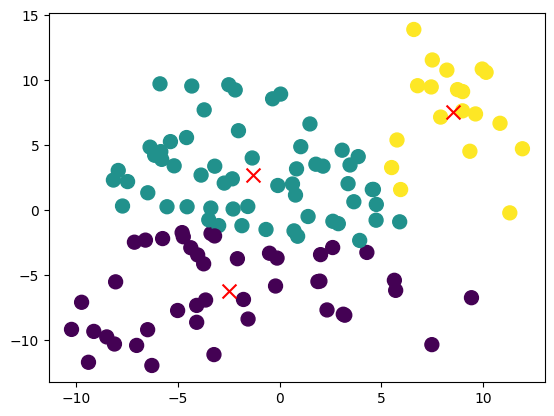

In [23]:
# 그룹핑이 원하는대로 되지 않았다는 것을 볼수 잇음
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', marker='x', s=100)

In [24]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init='auto')

In [26]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5,
       0, 3, 2, 0, 0, 0, 2, 2, 3, 0, 4, 0, 3, 1, 1, 1, 1, 1, 0, 3, 3, 2,
       4, 4, 3, 1, 0, 1, 0, 1, 2, 1, 1, 3, 2, 3, 0, 0, 3, 1, 4, 3, 2, 1,
       2, 2, 0, 2, 1, 0, 3, 5, 0, 0, 0, 3, 2, 2, 2, 5, 0, 2, 3, 3, 2, 0,
       1, 4, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 3, 3, 1, 2, 2, 3, 3, 0, 1,
       2, 2, 5, 1, 5, 0, 0, 1, 5, 3])

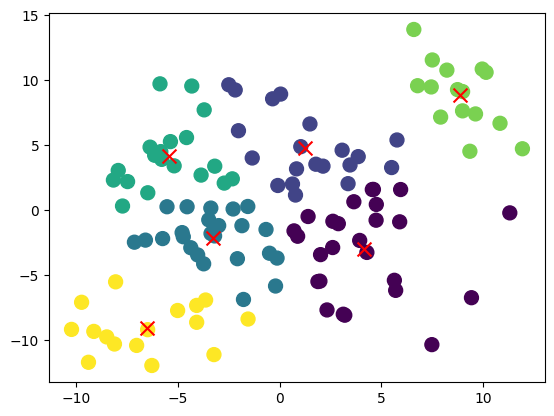

In [27]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', marker='x', s=100)

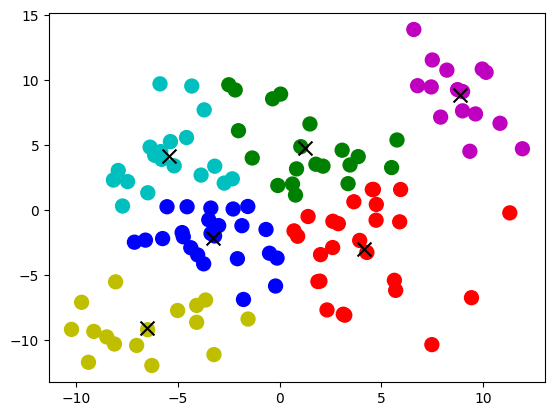

In [32]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
plt.scatter(x=data[:, 0], y=data[:, 1], c=[colors[p] for p in pred], s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='k', marker='x', s=100)
#빨강 파랑, 민트, 초록을 하나의 그룹으로 생각하여 3개의 그룹으로 나눈다

# 3절 Hierarchical 클러스터링 (계층적 군집분석)
- 계층적 분석(linkage) : 행렬 연산을 하기에 문자가 있으면 안됨
- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성
    - 군끼리 묶으면서 최종적으로는 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    - 군집의 수를 미리 정해주지 않아도 됨
    - Dendrogram을 이용하여 다양한 군집수 시각화

In [36]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa


In [37]:
# 계층적 군집결과와 맞추기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,2


In [38]:
from scipy.cluster.hierarchy import linkage
# method='single' : 가장 가까운 거리를 사용
# method='complete' : 가장 먼 거리를 이용
cluster_model = linkage(iris, method='complete')
cluster_model.shape

(149, 4)

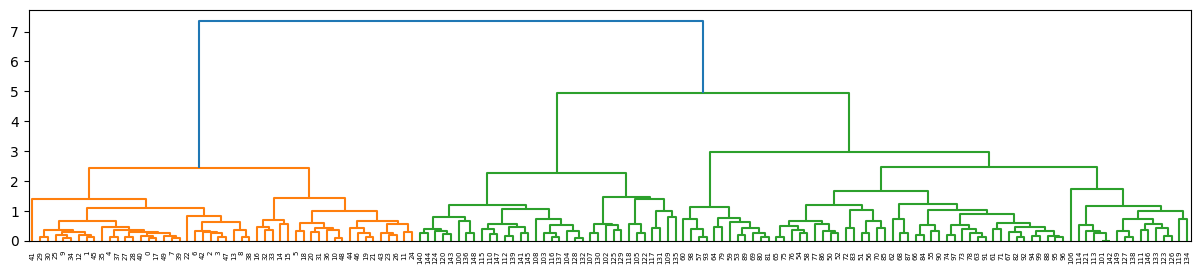

In [41]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
dendrogram(cluster_model, labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png', dpi=300)
plt.show()

In [42]:
# 클러스터링
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, # linkage()로 만든 클러스터링 결과
        t=4, # 클러스터를 나누는 임계값 (threshold)
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [43]:
pred = fcluster(cluster_model, 4, criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [44]:
np.choose([3, 3, 2, 1, 2], [0, 10, 20, 30]) # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [48]:
# pred에서 1은 0으로, 3은 1로, 2는 2로 변경
adjusted_pred = np.choose(pred, [999, 0, 2, 1]) # 조정된 예측치 (실제값: iris.species)
pd.crosstab(iris.species, adjusted_pred, rownames=['실제값'], colnames=['예측값'], margins=True)

예측값,0,1,2,All
실제값,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [51]:
original_species = le.inverse_transform(iris.species)
pred_species = le.inverse_transform(adjusted_pred)
pd.crosstab(original_species, pred_species, rownames=['실제값'], colnames=['예측값'], margins=True)

예측값,setosa,versicolor,virginica,All
실제값,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


<Axes: xlabel='petal_length', ylabel='petal_width'>

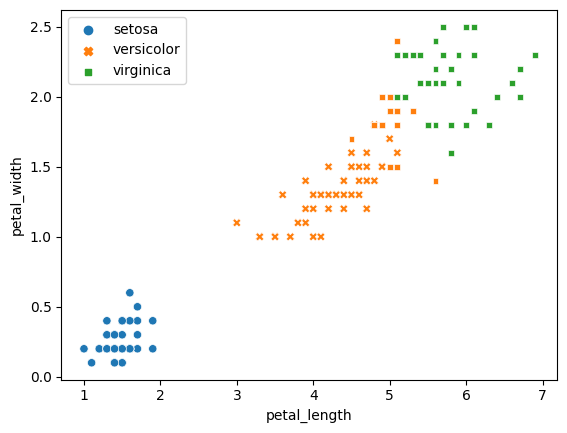

In [55]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue=pred_species, style=original_species)

# 4절 DBSCAN 클러스터링
- 연결 기반 (밀도 기반) 군집화 알고리즘, 이상치를 자동 감지
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

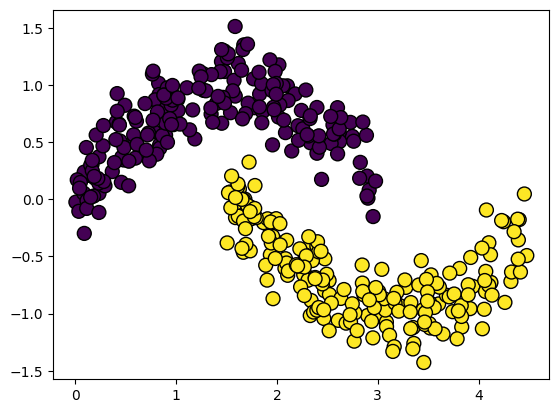

In [66]:
X1 = np.random.rand(200)*3 # 0 <= rand(데이터 갯수)*3 < 3. 균등분포
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise
# plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(X1.shape,0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(X2.shape,1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100, edgecolors='k')


In [68]:
#KMeans : 거리 기반 클러스터링
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=10)
model.fit(data[:, :2])
pred = model.predict(data[:, :2])


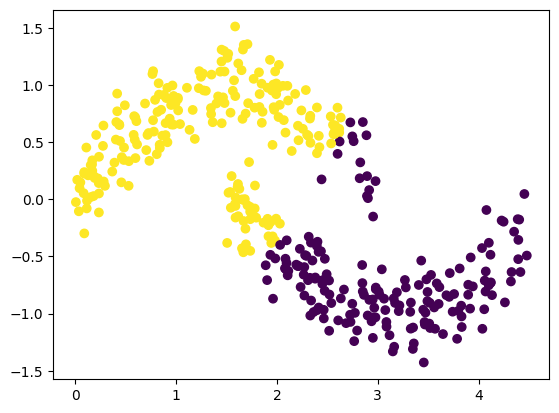

In [70]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred)

In [72]:
# DBSCAN : 밀도 기반
from sklearn.cluster import DBSCAN
# 반경(epsilon)이 0.3 이내의 최소 10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:,:2])

DBSCAN(eps=0.3, min_samples=10)

In [77]:
label = db_model.labels_ # -1 : 이상치 자동 감지
# 0 그룹으로 분류된 data
n_noise = list(label).count(-1)
print('이상치 갯수 :', n_noise)

이상치 갯수 : 4


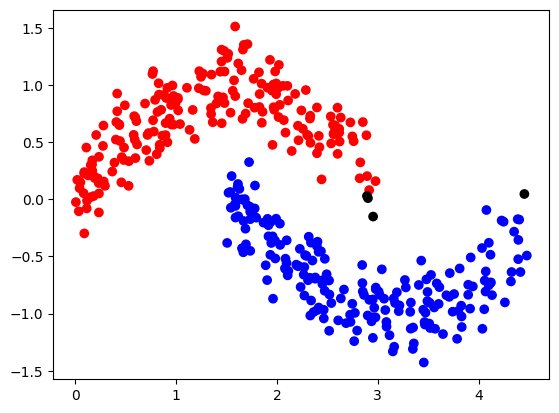

In [93]:
colors = ['r', 'b', 'k']
plt.scatter(x=data[:, 0], y=data[:, 1], c=[colors[l] for l in label])

# 5절 군집모형의 성능평가
- score함수를 통해 예측 모형 평가 (분류, 회귀, 군집에서는 안 씀)
- metrics 모듈의 함수를 통해 군집 모형 평가 (클러스터 소속과 갯수를 모두를 알고 있을 때) 
- 실루엣 계수(클러스터 소속과 갯수를 모를때)

## 5.1 metrics 함수 이용

In [95]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,0


In [96]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [100]:
# 3개 그룹으로 군집화
iris_model3 = KMeans(n_clusters=3, n_init=10)
iris_model3.fit(iris_X)
pred3 = iris_model3.labels_
print(pred)
pred3 = iris_model3.predict(iris_X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [99]:
# 3개의 그룹으로 군집화한 자료
print('실제값 :', iris_y[::50])
print('예측값 :', pred3[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 : [0 1 2]


In [101]:
# 2개 그룹으로 군집화
iris_model2 = KMeans(n_clusters=2, n_init=10)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_
print(pred2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [104]:
pred2 = np.choose(pred2, [1, 0])
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
# 2개 그룹으로 군집화한 자료
iris_y2 = np.array([0]*50+[1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand 지수

In [109]:
# 3개 그룹
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, labels_pred=pred3)

0.7302382722834697

In [110]:
# 2개 그룹
adjusted_rand_score(labels_true=iris_y2, labels_pred=pred2)

0.920405050901892

### 상호의존도를 나타내는 지표
- 두 군집간 정보 공유 정도

In [114]:
original_species = le.inverse_transform(iris_y)
pred_species = le.inverse_transform(pred3)

In [115]:
# 3그룹 평가
from sklearn.metrics import mutual_info_score
print(mutual_info_score(iris.species, pred3))
print(mutual_info_score(original_species, pred_species))

0.8255910976103356
0.8255910976103356


In [116]:
# 2그룹 평가
print(mutual_info_score(iris_y2, pred2))

0.5596576064224734


###  그 외 클러스터링 성능평가 기준들

In [119]:
from sklearn.metrics import homogeneity_score
print('3그룹 :', homogeneity_score(iris.species, pred3))
print('2그룹 :', homogeneity_score(iris_y2, pred2))

3그룹 : 0.7514854021988338
2그룹 : 0.8792539652679946


In [120]:
from sklearn.metrics import completeness_score
print('3그룹 :', completeness_score(iris.species, pred3))
print('2그룹 :', completeness_score(iris_y2, pred2))

3그룹 : 0.7649861514489815
2그룹 : 0.861693475999054


In [121]:
# homogeneous_score와 completeness_score의 조화평균
from sklearn.metrics import v_measure_score
print('3그룹 :', v_measure_score(iris.species, pred3))
print('2그룹 :', v_measure_score(iris_y2, pred2))

3그룹 : 0.7581756800057784
2그룹 : 0.870385156563164


## 5.2 실루엣 계수

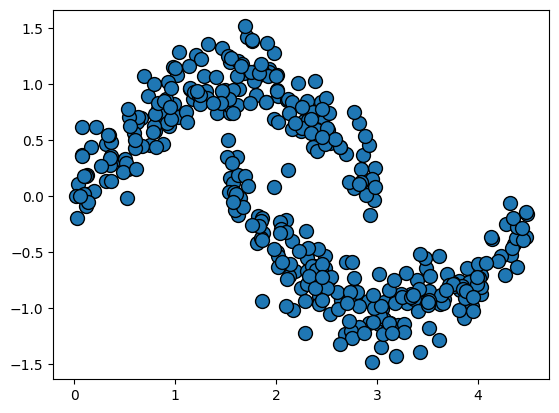

In [125]:
X1 = np.random.rand(200)*3 # 0 <= rand(데이터 갯수)*3 < 3. 균등분포
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise
# plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(X1.shape,0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(X2.shape,1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:,0], y=data[:,1], s=100, edgecolors='k')
plt.show()

In [129]:
from sklearn.metrics import silhouette_score, silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_cluster in range_n_clusters:
    model = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10)
    model.fit(data[:, :-1])
    score = silhouette_score(X=data[:,:-1], labels=model.labels_)
    print('클러스터 수 : {}, 실루엣 계수 : {}'.format(n_cluster, score))
# 실루엣 계수가 가장 높은 7개로 클러스터링을 할 예정

클러스터 수 : 2, 실루엣 계수 : 0.5373785965299884
클러스터 수 : 3, 실루엣 계수 : 0.44584503651551766
클러스터 수 : 4, 실루엣 계수 : 0.45476480848989664
클러스터 수 : 5, 실루엣 계수 : 0.45686414258896846
클러스터 수 : 6, 실루엣 계수 : 0.47763325389673056
클러스터 수 : 7, 실루엣 계수 : 0.4784778544276479
클러스터 수 : 8, 실루엣 계수 : 0.46789594789676786
클러스터 수 : 9, 실루엣 계수 : 0.47081953889626865
클러스터 수 : 10, 실루엣 계수 : 0.4702896952851573


In [130]:
model = KMeans(n_clusters=7, init='random', n_init=10)
model.fit(data[:, :-1])
pred = model.predict(data[:,:-1])
pred

array([0, 6, 6, 0, 0, 5, 6, 0, 0, 5, 6, 6, 5, 5, 0, 6, 0, 0, 5, 5, 0, 5,
       5, 0, 6, 5, 0, 6, 5, 0, 6, 0, 0, 5, 6, 6, 6, 5, 5, 6, 5, 0, 0, 5,
       6, 0, 0, 0, 5, 0, 0, 6, 5, 6, 0, 0, 6, 6, 0, 6, 5, 0, 6, 5, 5, 5,
       0, 5, 5, 0, 5, 6, 0, 5, 0, 5, 0, 0, 0, 5, 5, 0, 6, 6, 6, 0, 5, 5,
       0, 0, 6, 5, 0, 6, 5, 0, 5, 0, 5, 5, 0, 6, 0, 6, 0, 6, 6, 5, 6, 5,
       0, 0, 5, 0, 5, 6, 5, 6, 0, 6, 6, 0, 6, 0, 6, 6, 5, 0, 6, 5, 0, 0,
       5, 6, 6, 5, 0, 0, 6, 0, 0, 0, 6, 0, 6, 6, 0, 5, 6, 0, 5, 0, 5, 6,
       6, 6, 6, 0, 0, 0, 0, 5, 0, 6, 0, 6, 6, 0, 0, 6, 0, 5, 6, 6, 6, 5,
       6, 6, 6, 2, 1, 0, 6, 0, 5, 6, 6, 0, 6, 5, 5, 5, 0, 0, 0, 6, 6, 5,
       5, 0, 3, 1, 1, 1, 3, 4, 1, 1, 3, 4, 1, 1, 4, 4, 1, 2, 1, 3, 4, 3,
       3, 4, 4, 3, 2, 4, 3, 2, 4, 1, 1, 3, 3, 4, 2, 1, 2, 4, 3, 1, 4, 3,
       3, 4, 2, 3, 3, 1, 4, 1, 3, 1, 4, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 4,
       4, 4, 3, 4, 4, 1, 4, 2, 3, 4, 3, 4, 1, 3, 3, 4, 3, 3, 2, 1, 2, 3,
       4, 4, 3, 3, 2, 4, 1, 2, 4, 3, 3, 3, 4, 4, 3,

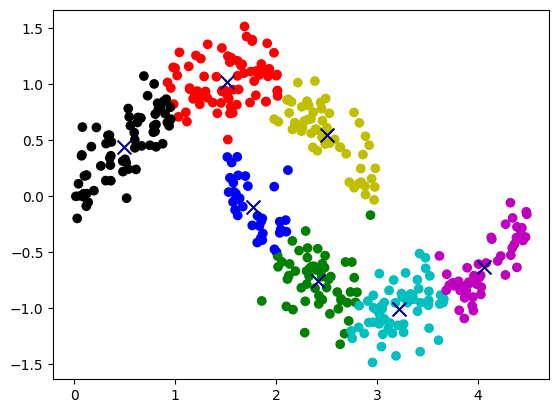

In [140]:
centers = model.cluster_centers_
label = model.labels_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # 6,1,5 => 0 / 1,2,3,4=>1
plt.scatter(x=data[:,0], y=data[:,1], c=[colors[l] for l in label])
plt.scatter(x=centers[:,0], y=centers[:,1], color='navy', marker='x', s=100)

# 6절 연습문제
```
iris 데이터의 petal_length열과
petal_width열을 이용해서 K-Means
알고리즘으로 군집분석하고 그래프로
시각화하세요(단, 각 클러스터의 중심점이 함께
표시되고 군의 수는 2로 설정)
```